## Projeto-ML-Classificacao- Previsoes-de-digitos-usando-KNN

Faremos previsões de dígitos escritos a mão no dataset mnist. modelo terá que prever uma entre 10 saídas possíveis
para cada registro (dígitos de 0 a 10)

In [4]:
# Carregando os pacotes
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Carregando o dataset
digitos = load_digits()

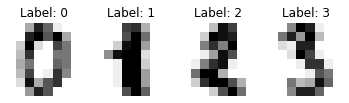

In [8]:
# Visualizando algumas imagens e labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [9]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [10]:
# Formato do X e Y
X.shape, Y.shape

((1797, 64), (1797,))

### Pré-Processamento e Normalização dos dados

In [11]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y, test_size = 0.30, random_state = 40)

In [13]:
# Divisão dos dados de treino em dados de treino e dados de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino,
                                                                    y_treino,
                                                                    test_size = 0.1,
                                                                    random_state = 30)

In [14]:
# Imprimindo o número de exemplos em cada dataset
print("Exemplo de Treino: {}".format(len(treinoLabels)))
print("Exemplo de Validação: {}".format(len(validLabels)))
print("Exemplo de Teste: {}".format(len(y_teste)))

Exemplo de Treino: 1131
Exemplo de Validação: 126
Exemplo de Teste: 540


In [16]:
# Normalizando os dados pela média
X_norm = np.mean(X, axis = 0)

# Normalizando os dados de treino e teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = X_teste - X_norm

In [17]:
# shape dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


### Descobrindo o Melhor valor e K para nosso modelo KNN

In [18]:
# Range de valores de k que iremos testar
kvals = range(1, 30, 2)

In [20]:
# Lista vazia para receber as acurácia
acuracias = []

In [21]:
# Loop em todos os valores de k para testar cada um deles
for k in kvals:
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(treinoData, treinoLabels)
    
    # Avaliando o modelo e atualizando a lista de acurácia
    score = modeloKNN.score(validData, validLabels)
    print("Com o valor de k = %d, a acurácia é = %.2d%%" % (k, score * 100))
    acuracias.append(score)

Com o valor de k = 1, a acurácia é = 100%
Com o valor de k = 3, a acurácia é = 99%
Com o valor de k = 5, a acurácia é = 100%
Com o valor de k = 7, a acurácia é = 99%
Com o valor de k = 9, a acurácia é = 100%
Com o valor de k = 11, a acurácia é = 98%
Com o valor de k = 13, a acurácia é = 97%
Com o valor de k = 15, a acurácia é = 96%
Com o valor de k = 17, a acurácia é = 96%
Com o valor de k = 19, a acurácia é = 96%
Com o valor de k = 21, a acurácia é = 97%
Com o valor de k = 23, a acurácia é = 96%
Com o valor de k = 25, a acurácia é = 96%
Com o valor de k = 27, a acurácia é = 97%
Com o valor de k = 29, a acurácia é = 97%


In [22]:
# Obtendo o valor de K que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de K = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kvals[i],
                                                                                            acuracias[i] * 100))

O valor de K = 1 alcançou a mais alta acurácia de 100.00% nos dados de validação!
